# Tests de différents modèles

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ARDRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from zipfile import ZipFile

import datetime
import json
import re
import shutil

from tqdm import tqdm

import seaborn as sns

import ipywidgets
import os

import tensorflow as tf
import tensorflow.keras as keras

2024-01-03 09:24:52.576455: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def visu_df(
    list_columns=None,
    df_model=None
    ):
    """Utility function to display dataframe over 3 columns
    Args:
        df_model (_type_, optional): _description_.
    """
    
    if list_columns==None:
        list_columns=['Masse_Totale', 'Masse_Grasse']
    
    # Visu parameters
    N_COLS = 3
    N_ROWS = len(list_columns)//N_COLS+1
    HEIGHT = 8 * N_ROWS

    fig, axs = plt.subplots(nrows=N_ROWS,ncols=N_COLS, figsize=(24,HEIGHT*3/4))

    for i,name in enumerate(list_columns):
        r = i//N_COLS
        c = i%N_COLS
        titre = name
        axs[r,c].set_title(titre)
        df_model[name].plot(ax=axs[r,c])
        axs[r,c].grid(True)
        
    return fig, axs
        
    # # Visu

    # columns_to_display = ['delta_Masse_Grasse', 'delta_Masse_Musculaire'] #, 'delta_Masse_Totale', 'delta_Masse_Osseuse', 'delta_Masse_Hydrique']

    # # fig, axs = plt.subplots(3,2,figsize=(24,12), subplot_kw={"projection" : "3d"})

    # x = df_model['moyenne_Calories']
    # y = df_model['moyenne_exo_cals_nets']

    # X = np.arange(x.min(), x.max(), 10.0)
    # Y = np.arange(y.min(), y.max(), 10.0)
    # X, Y = np.meshgrid(X, Y)
    # Z = np.zeros(shape=X.shape)

    # for i,name in enumerate(columns_to_display):
    #     z = df_model[name]
    #     titre = name + f'\ntoutes valeurs moyennées sur {AVERAGE_DAYS} jours' + F'\nvariation quotidienne masses moyennée sur {PERIODE_CALCUL_VARIATION} jours'
    #     fig, ax = plt.subplots(subplot_kw={"projection" : "3d"}, figsize=(8,8))

    #     ax.set_title(titre)
        
    #     c = [ 'blue' if val >= 0 else 'red' for val in z ]
    #     ax.scatter(x, y, z, label=name, color=c)
        
    #     ax.plot_surface(X, Y, Z, edgecolor='yellow', lw=0.5, rstride=8, cstride=8, alpha=0.2)

### Charge dataset

In [3]:
file_path = os.getcwd() + "/data/dataset.csv"

with open(file_path, 'r') as f:
    df = pd.read_csv(file_path, index_col=0)

In [4]:
df

,Masse_Totale,Masse_Grasse,Masse_Osseuse,Masse_Musculaire,Masse_Hydrique,MG%,BMR,Calories,Lipides,Glucides,Proteines,exo_duree,exo_cals_bruts,exo_cals_nets,Depense_cal_totale,cal_deficit
2020-08-09,107.250000,37.190000,NaN,NaN,NaN,0.346760,1883.2960,1861.3,71.3,245.0,66.1,0.0,0.0,0.000000,1883.296000,-21.996000
2020-08-11,104.650000,33.150000,NaN,NaN,NaN,0.316770,1914.4000,1772.4,50.5,185.8,104.1,0.0,0.0,0.000000,1914.400000,-142.000000
2020-08-12,104.350000,33.800000,NaN,NaN,NaN,0.323910,1893.8800,1894.3,59.3,220.3,87.5,0.0,0.0,0.000000,1893.880000,0.420000
2020-08-13,104.400000,34.340000,NaN,NaN,NaN,0.328927,1883.2960,1822.6,71.5,227.7,70.2,0.0,0.0,0.000000,1883.296000,-60.696000
2020-08-14,104.500000,33.850000,NaN,NaN,NaN,0.323923,1896.0400,1891.5,61.8,217.2,82.5,0.0,0.0,0.000000,1896.040000,-4.540000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-29,73.100000,12.794000,3.010000,57.278000,40.282000,0.175021,1672.6096,3766.6,145.2,493.7,128.9,3180.0,244.0,182.438674,1855.048274,1911.551726
2023-12-30,74.404000,13.175000,3.056000,58.158000,41.076000,0.177074,1692.5464,1680.1,48.3,144.7,157.8,1680.0,261.0,228.089376,1920.635776,-240.535776
2023-12-31,73.695000,12.560833,3.055000,58.064167,41.090833,0.170443,1690.4980,2823.0,96.3,222.4,177.5,6000.0,671.0,553.604306,2244.102306,578.897694
2024-01-01,75.071667,11.675000,3.190000,60.191667,43.518333,0.155518,1739.3680,2568.9,73.7,265.0,163.5,0.0,0.0,0.000000,1739.368000,829.532000


In [5]:
# columns_to_display = ['Masse_Totale', 'Masse_Grasse', 'Masse_Musculaire', 'Masse_Osseuse', 'Masse_Hydrique', 'MG%', 'BMR', 'Calories', 'Lipides', 'Glucides', 'Proteines', 'exo_cals_nets', 'cal_deficit']

# fig, axs = visu_df(list_columns=columns_to_display,
#         df_model=df)

# plt.show()

# LR pour prédiction masses

In [6]:
columns_to_keep = ['Masse_Totale', 'Masse_Grasse', 'BMR', 'Calories', 'exo_cals_nets']

df_mg = df[columns_to_keep].copy()

df_mg['next_day_MT'] = df_mg['Masse_Totale'].shift(-1)
df_mg['next_day_MG'] = df_mg['Masse_Grasse'].shift(-1)

df_mg['Proxy_Cal_Def'] = df_mg['Calories'] - df_mg['BMR'] - df_mg['exo_cals_nets']

df_mg.dropna(inplace=True)

df_mg

,Masse_Totale,Masse_Grasse,BMR,Calories,exo_cals_nets,next_day_MT,next_day_MG,Proxy_Cal_Def
2020-08-09,107.250000,37.190000,1883.2960,1861.3,0.000000,104.650000,33.150000,-21.996000
2020-08-11,104.650000,33.150000,1914.4000,1772.4,0.000000,104.350000,33.800000,-142.000000
2020-08-12,104.350000,33.800000,1893.8800,1894.3,0.000000,104.400000,34.340000,0.420000
2020-08-13,104.400000,34.340000,1883.2960,1822.6,0.000000,104.500000,33.850000,-60.696000
2020-08-14,104.500000,33.850000,1896.0400,1891.5,0.000000,104.250000,34.280000,-4.540000
...,...,...,...,...,...,...,...,...
2023-12-28,72.683333,12.099167,1678.6180,2395.2,0.000000,73.100000,12.794000,716.582000
2023-12-29,73.100000,12.794000,1672.6096,3766.6,182.438674,74.404000,13.175000,1911.551726
2023-12-30,74.404000,13.175000,1692.5464,1680.1,228.089376,73.695000,12.560833,-240.535776
2023-12-31,73.695000,12.560833,1690.4980,2823.0,553.604306,75.071667,11.675000,578.897694


In [7]:
start_date = '2021-04-01'
end_date = '2023-12-31'

df_mg = df_mg.loc[(df_mg.index >= start_date) & (df_mg.index <= end_date)]

df_mg

,Masse_Totale,Masse_Grasse,BMR,Calories,exo_cals_nets,next_day_MT,next_day_MG,Proxy_Cal_Def
2021-04-01,75.933333,13.840000,1711.2160,1808.6,0.000000,76.250000,12.895000,97.384000
2021-04-02,76.250000,12.895000,1738.4680,1859.3,0.000000,76.212500,13.120000,120.832000
2021-04-03,76.212500,13.120000,1732.7980,1797.1,275.082472,76.025000,13.490000,-210.780472
2021-04-04,76.025000,13.490000,1720.7560,2059.6,440.582237,76.200000,14.053333,-101.738237
2021-04-05,76.200000,14.053333,1712.3680,1780.6,0.000000,75.816667,13.450000,68.232000
...,...,...,...,...,...,...,...,...
2023-12-27,73.326667,12.425833,1685.4580,1653.4,461.613392,72.683333,12.099167,-493.671392
2023-12-28,72.683333,12.099167,1678.6180,2395.2,0.000000,73.100000,12.794000,716.582000
2023-12-29,73.100000,12.794000,1672.6096,3766.6,182.438674,74.404000,13.175000,1911.551726
2023-12-30,74.404000,13.175000,1692.5464,1680.1,228.089376,73.695000,12.560833,-240.535776


In [8]:
def visu_avg(
    df=df_mg,
    window=7,
):
    """utility function pour afficher les graphes sur données moyennées

    Args:
        df (_type_, optional): _description_. Defaults to df_model.
        window (int, optional): _description_. Defaults to 7.
    """
    
    # créé la dataframe moyennée
    df_avg = df.rolling(window=window).mean().dropna()
    
    # affiche les graphes bruts
    # columns_to_display = ['Masse_Grasse', 'Masse_Totale' , 'Calories', 'exo_cals_nets', 'delta_Masse_Grasse', 'delta_Masse_Musculaire'] # 'Masse_Totale', 'cal_deficit', 'delta_Masse_Totale', 'Masse_Musculaire', 'Proteines'
    columns_to_display = list(df_avg.columns)
    fig, axs = visu_df(list_columns=columns_to_display, df_model=df_avg)
    fig.suptitle(f'Données moyennées sur {window} jour(s)', fontsize=16)
    plt.show()
    
    # affiche la matrice de correlation
    fig, ax = plt.subplots(figsize=(8,8))
    dataplot = sns.heatmap(df_avg.corr(), cmap="YlGnBu", annot=True, fmt=".2f", ax=ax ) 
    fig.suptitle(f'Correlation matrix - données moyennées sur {window} jour(s)', fontsize=16)
    plt.show()
    
    # affiche pairplot partiel
    # list_columns = ['delta_Masse_Grasse', 'delta_Masse_Musculaire', 'Masse_Grasse', 'Masse_Musculaire', 'Calories', 'Proteines',  'exo_cals_nets'] # 'delta_Masse_Totale', 'Masse_Totale',  'cal_deficit'
    list_columns = list(df_avg.columns)
    sns.pairplot(data=df_avg[list_columns], diag_kind='kde', height=1.75) # ax=ax) # diag_kind='kde', kind='scatter', ax=ax)
    fig.suptitle(f'Paiprlot partiel - données moyennées sur {window} jour(s)', fontsize=16)
    plt.show()

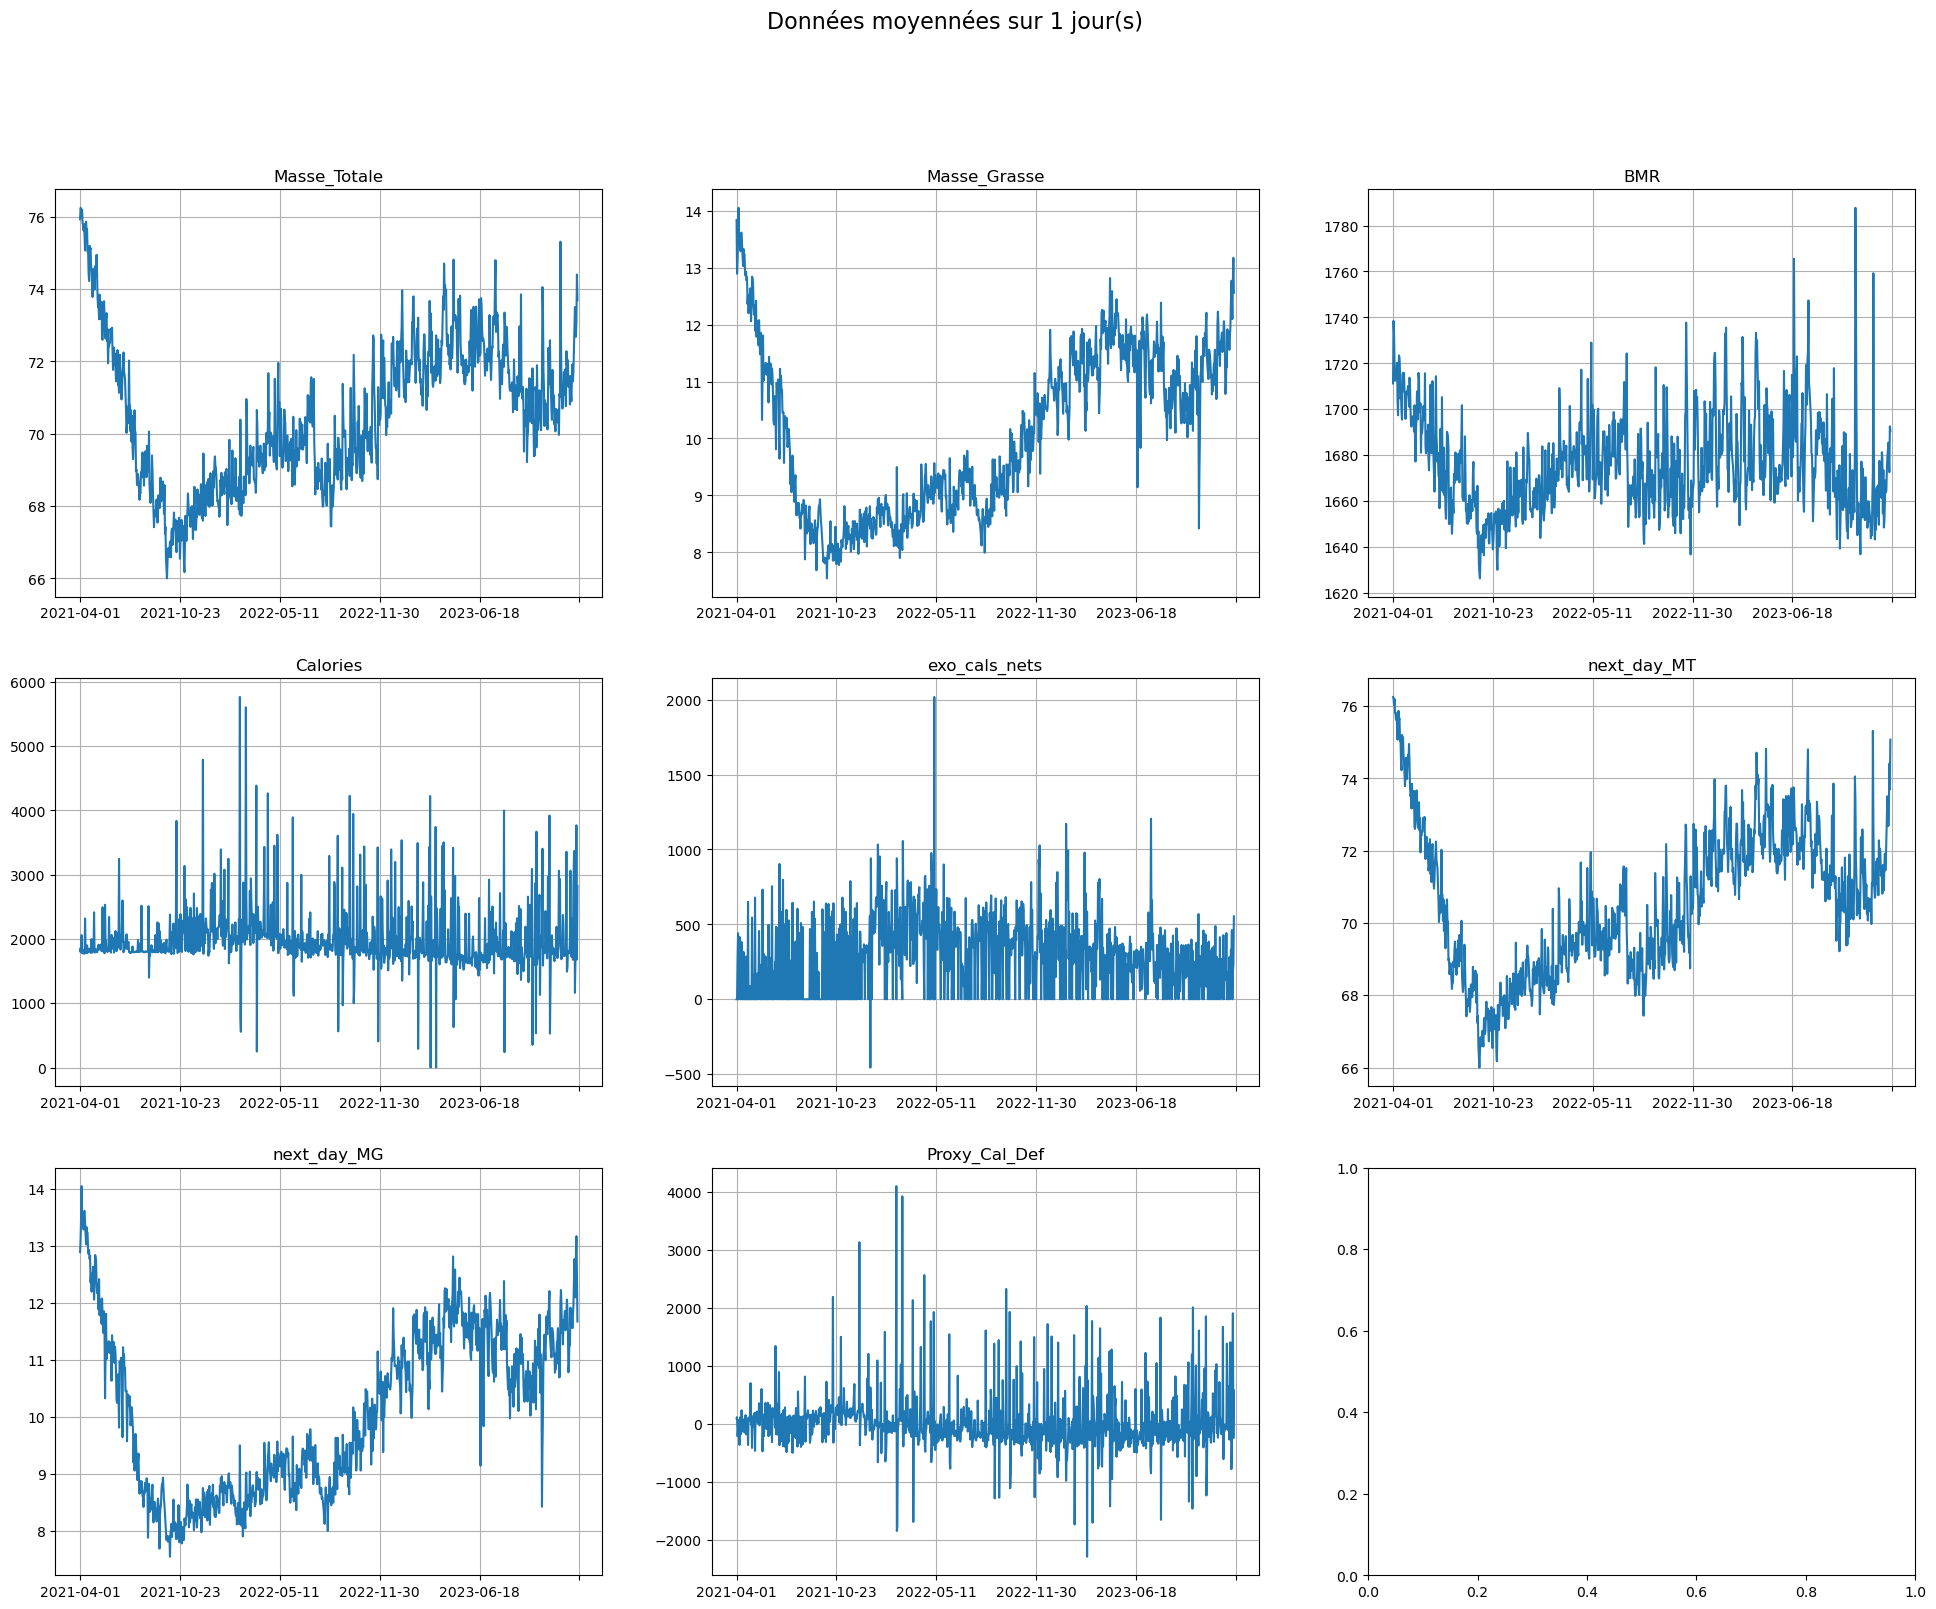

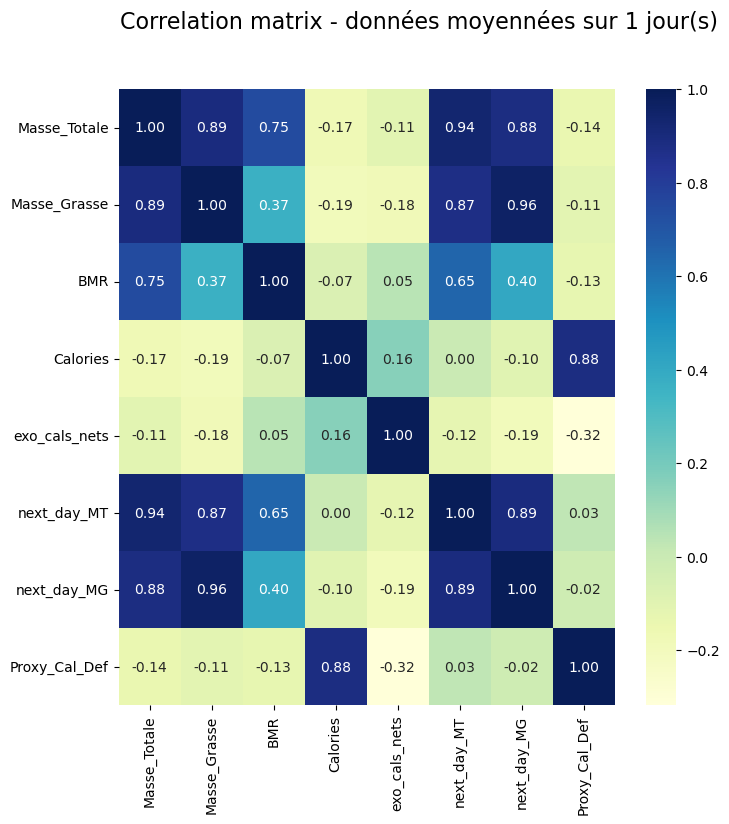

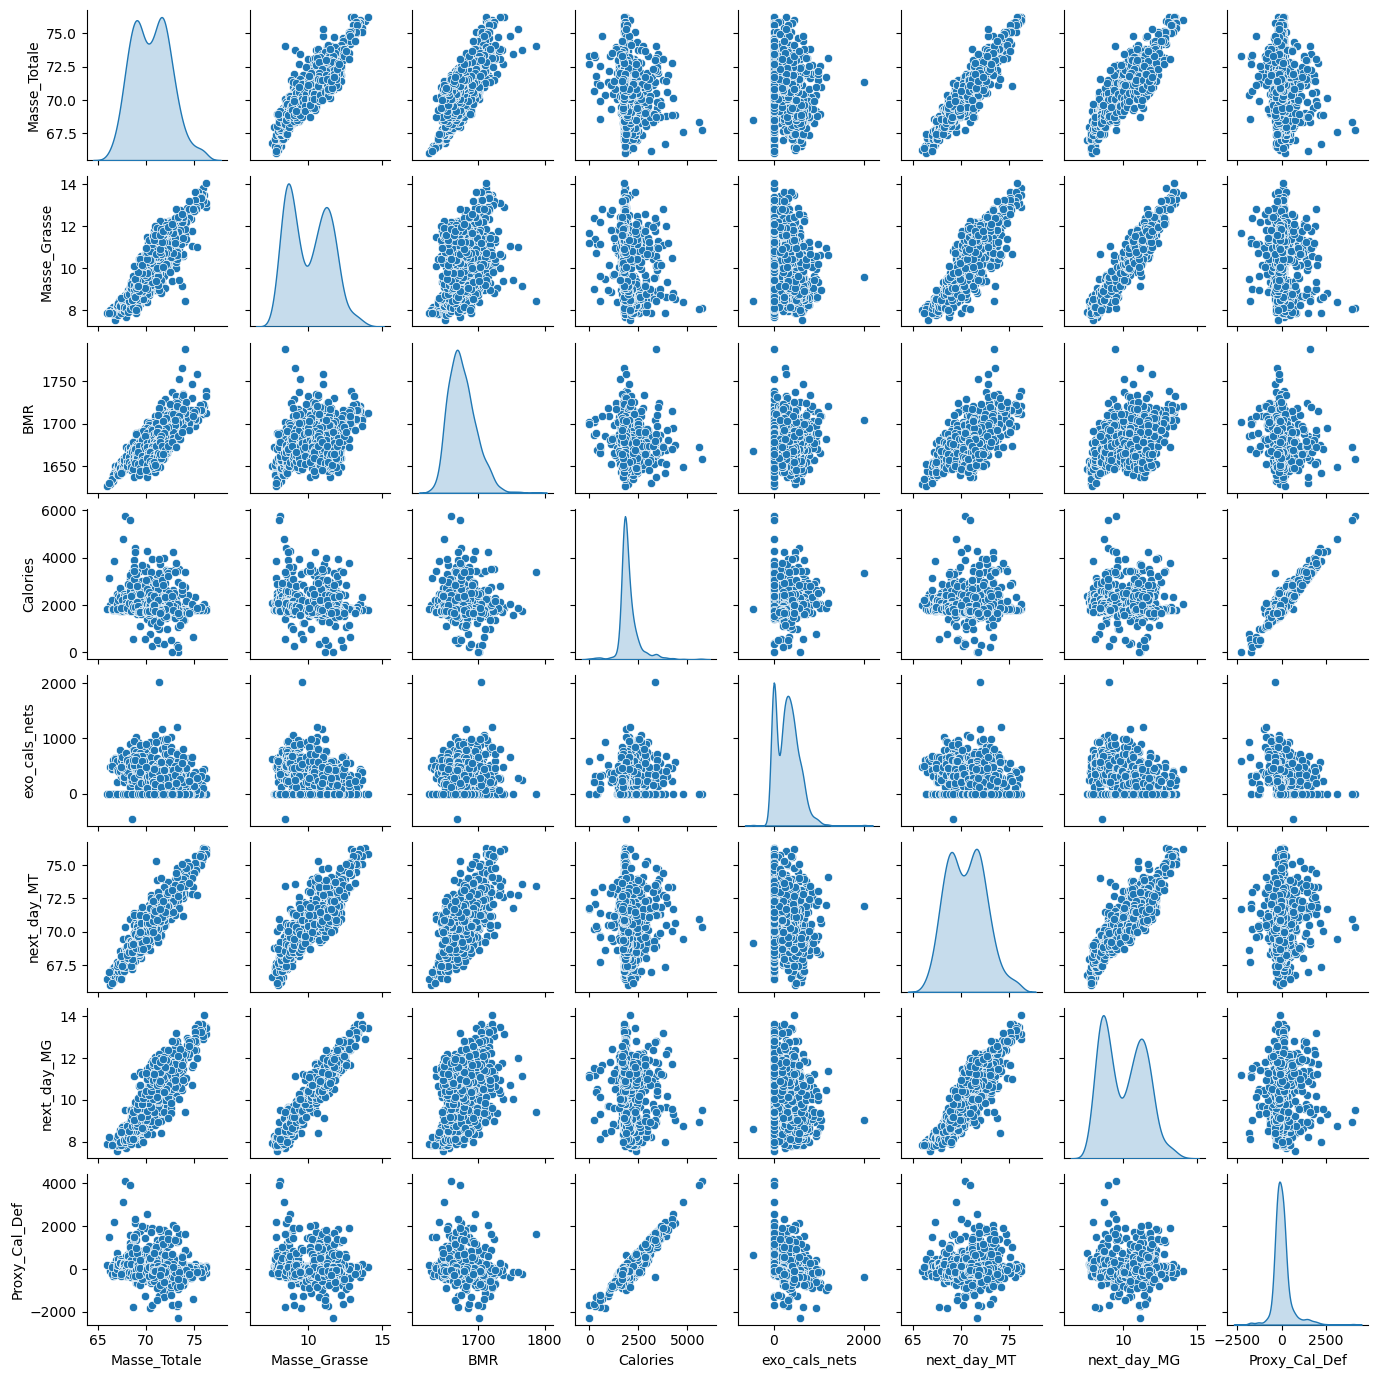

In [9]:
# visu_avg(df=df_mg, window=1)
# plt.show()

In [10]:
# lr = LinearRegression()
# X = df_mg[['Masse_Totale', 'Masse_Grasse', 'BMR', 'Calories', 'exo_cals_nets']].to_numpy()
# y = df_mg['next_day_MT'].to_numpy()

# lr.fit(X,y)

# y_pred = lr.predict(X)

# fig, ax = plt.subplots(figsize=(6,6))

# ax.scatter(y, y_pred)
# ax.set_xlabel('Ground Truth')
# ax.set_ylabel('Prediction')
# ax.set_title('Prediction Masse Totale')
# ax.grid(True)

# print(f'Coefficients = {lr.coef_}')
# print(f'r2 = {lr.score(X,y):.2f}')

In [11]:
# lr = LinearRegression()
# X = df_mg[['Masse_Totale', 'Masse_Grasse', 'Calories', 'BMR', 'exo_cals_nets']].to_numpy()
# y = df_mg['next_day_MG'].to_numpy()

# lr.fit(X,y)

# y_pred = lr.predict(X)

# fig, ax = plt.subplots(figsize=(6,6))

# ax.scatter(y, y_pred)
# ax.set_xlabel('Ground Truth')
# ax.set_ylabel('Prediction')
# ax.set_title('Prediction Masse Grasse')
# ax.grid(True)

# print(f'Coefficients = {lr.coef_}')
# print(f'r2 = {lr.score(X,y):.2f}')

## Les valeurs à J+1 de Masse Totale et Masse Grasse sont déterminées principalement par les valeurs de Masses à J, pas les calories ou les exercices. On calcule les variations pour passer outre l'autoregression.

# LR pour prédire les VARIATIONS de masses

In [12]:
df_mg

,Masse_Totale,Masse_Grasse,BMR,Calories,exo_cals_nets,next_day_MT,next_day_MG,Proxy_Cal_Def
2021-04-01,75.933333,13.840000,1711.2160,1808.6,0.000000,76.250000,12.895000,97.384000
2021-04-02,76.250000,12.895000,1738.4680,1859.3,0.000000,76.212500,13.120000,120.832000
2021-04-03,76.212500,13.120000,1732.7980,1797.1,275.082472,76.025000,13.490000,-210.780472
2021-04-04,76.025000,13.490000,1720.7560,2059.6,440.582237,76.200000,14.053333,-101.738237
2021-04-05,76.200000,14.053333,1712.3680,1780.6,0.000000,75.816667,13.450000,68.232000
...,...,...,...,...,...,...,...,...
2023-12-27,73.326667,12.425833,1685.4580,1653.4,461.613392,72.683333,12.099167,-493.671392
2023-12-28,72.683333,12.099167,1678.6180,2395.2,0.000000,73.100000,12.794000,716.582000
2023-12-29,73.100000,12.794000,1672.6096,3766.6,182.438674,74.404000,13.175000,1911.551726
2023-12-30,74.404000,13.175000,1692.5464,1680.1,228.089376,73.695000,12.560833,-240.535776


In [13]:
df_mg['var_MT'] = (df_mg['next_day_MT'] - df_mg['Masse_Totale']).copy()
df_mg['var_MG'] = (df_mg['next_day_MG'] - df_mg['Masse_Grasse']).copy()

df_mg.drop(columns=['next_day_MT', 'next_day_MG'], inplace=True)

/tmp/ipykernel_10141/3303602129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mg['var_MT'] = (df_mg['next_day_MT'] - df_mg['Masse_Totale']).copy()
/tmp/ipykernel_10141/3303602129.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mg['var_MG'] = (df_mg['next_day_MG'] - df_mg['Masse_Grasse']).copy()
/tmp/ipykernel_10141/3303602129.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [14]:
df_mg

,Masse_Totale,Masse_Grasse,BMR,Calories,exo_cals_nets,Proxy_Cal_Def,var_MT,var_MG
2021-04-01,75.933333,13.840000,1711.2160,1808.6,0.000000,97.384000,0.316667,-0.945000
2021-04-02,76.250000,12.895000,1738.4680,1859.3,0.000000,120.832000,-0.037500,0.225000
2021-04-03,76.212500,13.120000,1732.7980,1797.1,275.082472,-210.780472,-0.187500,0.370000
2021-04-04,76.025000,13.490000,1720.7560,2059.6,440.582237,-101.738237,0.175000,0.563333
2021-04-05,76.200000,14.053333,1712.3680,1780.6,0.000000,68.232000,-0.383333,-0.603333
...,...,...,...,...,...,...,...,...
2023-12-27,73.326667,12.425833,1685.4580,1653.4,461.613392,-493.671392,-0.643333,-0.326667
2023-12-28,72.683333,12.099167,1678.6180,2395.2,0.000000,716.582000,0.416667,0.694833
2023-12-29,73.100000,12.794000,1672.6096,3766.6,182.438674,1911.551726,1.304000,0.381000
2023-12-30,74.404000,13.175000,1692.5464,1680.1,228.089376,-240.535776,-0.709000,-0.614167


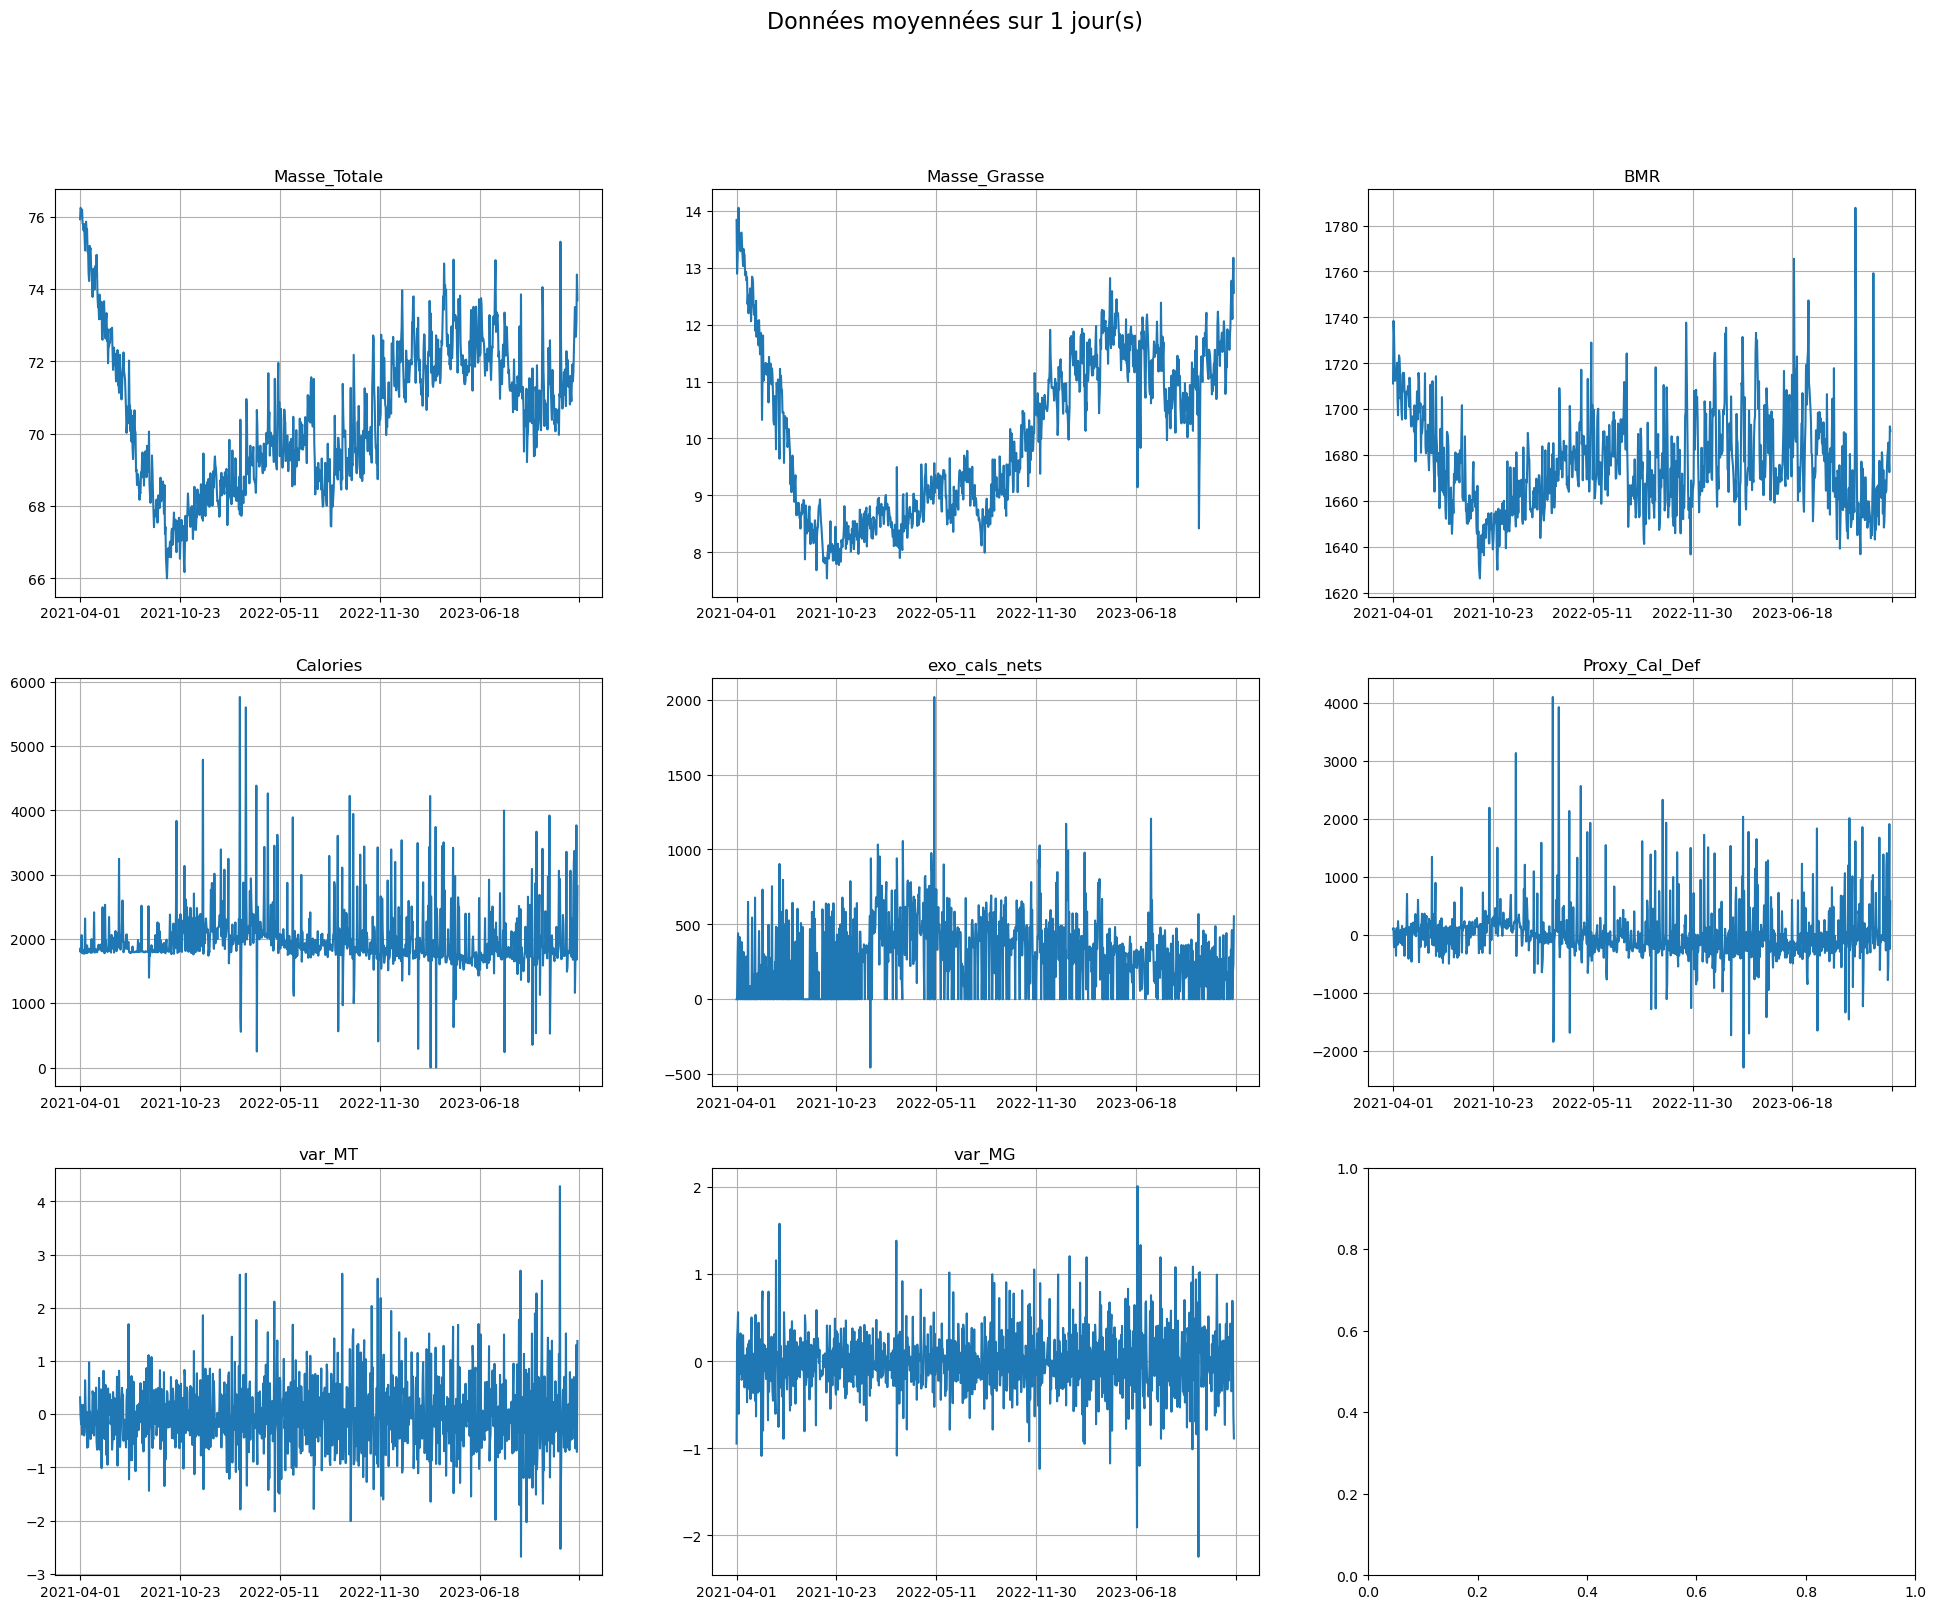

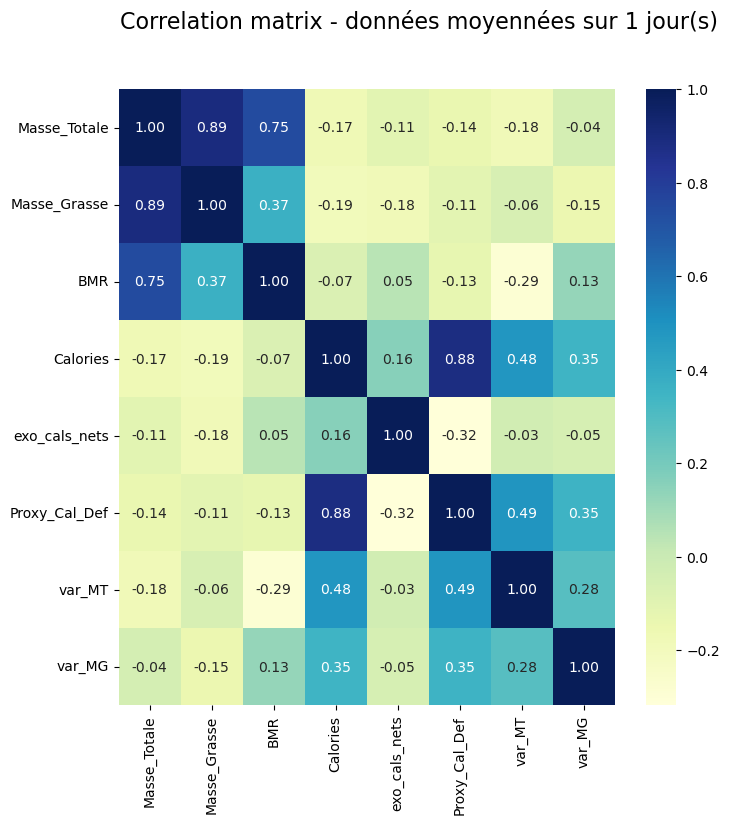

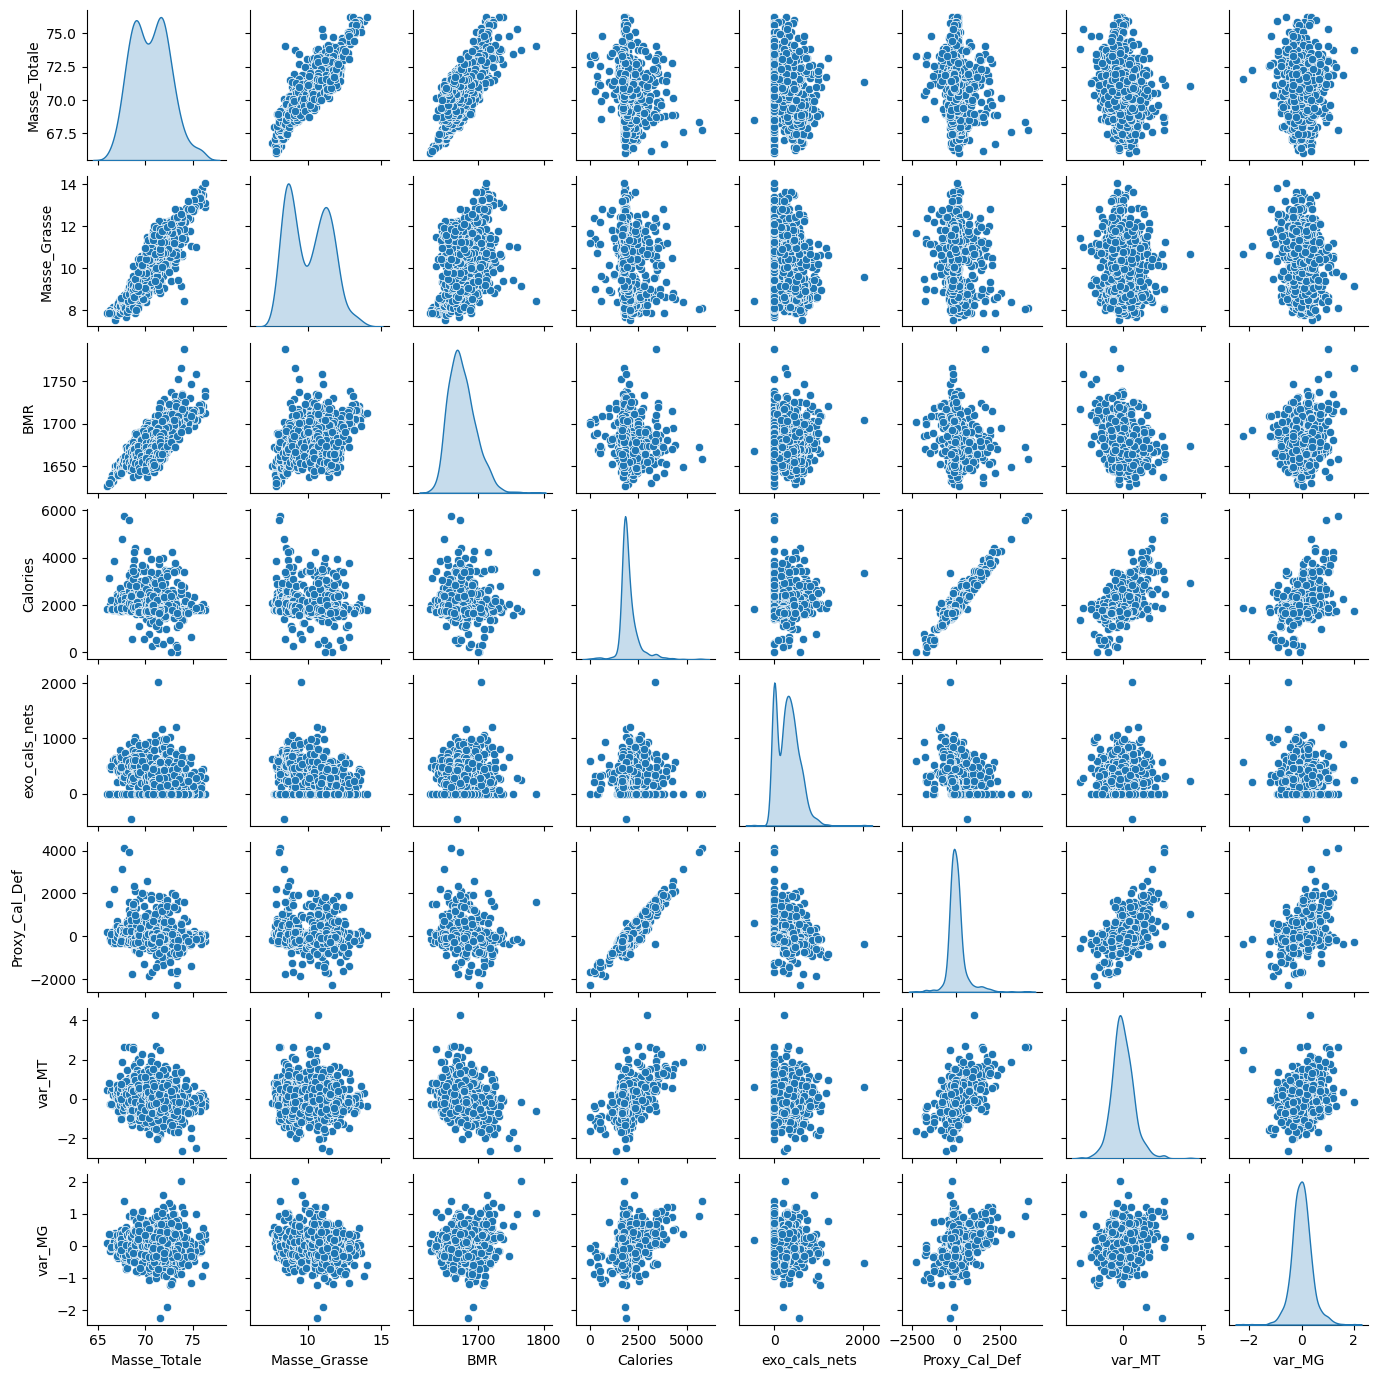

In [15]:
visu_avg(df=df_mg, window=1)

## Var_MG et Var_MT sont raisonnablement gaussiens

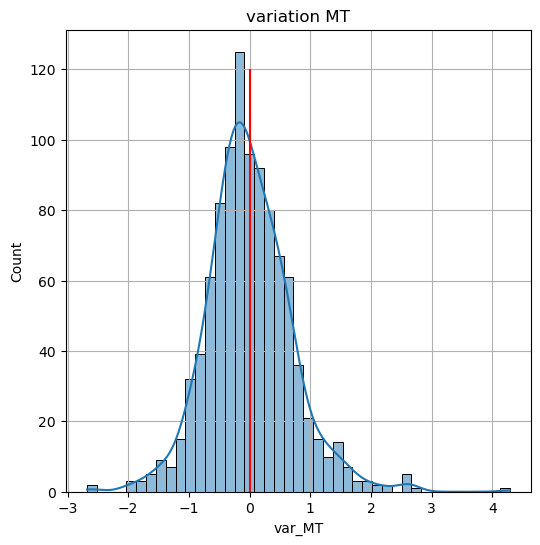

In [16]:
fig, ax = plt.subplots(figsize=(6,6))

# ax = df_mg['var_MT'].hist()
sns.histplot(data=df_mg['var_MT'], kde=True)
ax.grid(True)
ax.set_title(f'variation MT')
ax.vlines(x=[0.0], ymin=[0.0], ymax=[120.0], color='red')
plt.show()

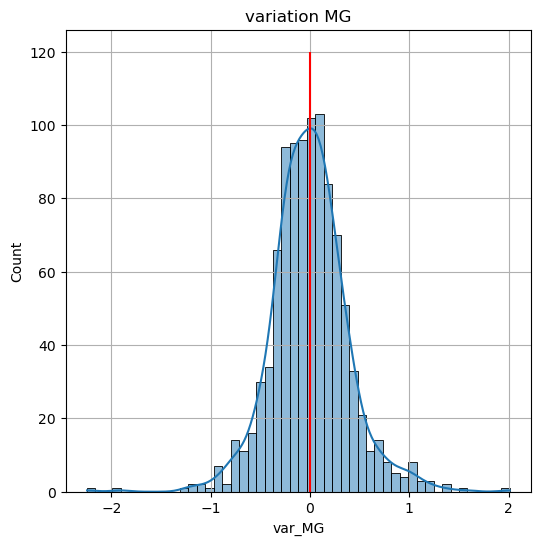

In [17]:
# fig, ax = plt.subplots(figsize=(6,6))

# ax.scatter(x=df_mg['Proxy_Cal_Def'], y=df_mg['var_MG'])
# ax.grid(True)
# ax.set_title(f'variation MG fonction de Proxy Cal Def')
# plt.show()

fig, ax = plt.subplots(figsize=(6,6))

sns.histplot(data=df_mg['var_MG'], kde=True)
ax.grid(True)
ax.set_title(f'variation MG')
ax.vlines(x=[0.0], ymin=[0.0], ymax=[120.0], color='red')
plt.show()

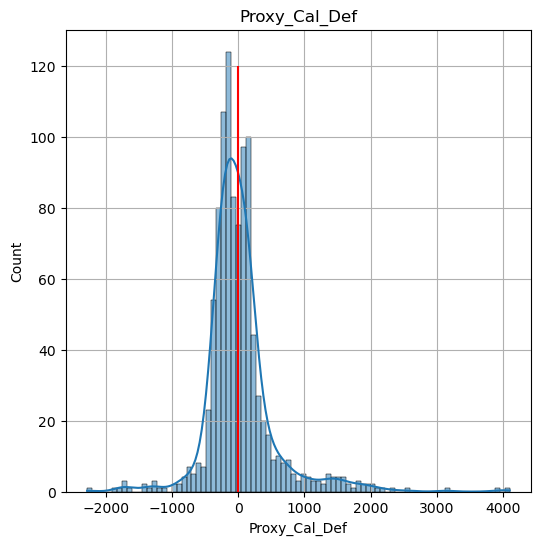

In [18]:
fig, ax = plt.subplots(figsize=(6,6))

sns.histplot(data=df_mg['Proxy_Cal_Def'], kde=True)
ax.grid(True)
ax.set_title(f'Proxy_Cal_Def')
ax.vlines(x=[0.0], ymin=[0.0], ymax=[120.0], color='red')
plt.show()

### Si on moyenne ?

In [59]:
PERIODE = 1

In [60]:
def get_df_avg(df=df_mg, periode=PERIODE):
    """utility fonction pour récupérer df_mg moyennée"""
    
    df_avg = df.rolling(window=periode).mean()
    df_avg.dropna(inplace=True)
    
    return df_avg

In [61]:
df_avg = get_df_avg()

df_avg


,Masse_Totale,Masse_Grasse,BMR,Calories,exo_cals_nets,Proxy_Cal_Def,var_MT,var_MG
2021-04-01,75.933333,13.840000,1711.2160,1808.6,0.000000,97.384000,0.316667,-0.945000
2021-04-02,76.250000,12.895000,1738.4680,1859.3,0.000000,120.832000,-0.037500,0.225000
2021-04-03,76.212500,13.120000,1732.7980,1797.1,275.082472,-210.780472,-0.187500,0.370000
2021-04-04,76.025000,13.490000,1720.7560,2059.6,440.582237,-101.738237,0.175000,0.563333
2021-04-05,76.200000,14.053333,1712.3680,1780.6,0.000000,68.232000,-0.383333,-0.603333
...,...,...,...,...,...,...,...,...
2023-12-27,73.326667,12.425833,1685.4580,1653.4,461.613392,-493.671392,-0.643333,-0.326667
2023-12-28,72.683333,12.099167,1678.6180,2395.2,0.000000,716.582000,0.416667,0.694833
2023-12-29,73.100000,12.794000,1672.6096,3766.6,182.438674,1911.551726,1.304000,0.381000
2023-12-30,74.404000,13.175000,1692.5464,1680.1,228.089376,-240.535776,-0.709000,-0.614167


Coefficients = [0.00064991]
r2 = 0.24


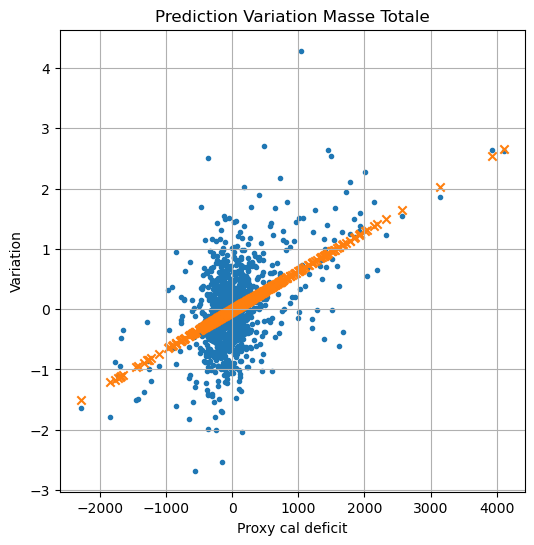

In [62]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(x=df_avg['Proxy_Cal_Def'], y=df_avg['var_MT'], label='ground truth', marker='.')
ax.grid(True)
ax.set_title(f'variation MT fonction de Proxy Cal Def (moyennes)')

X2 = np.array(df_avg['Proxy_Cal_Def']).reshape(-1,1)
y = df_avg['var_MT'].to_numpy()

lr = LinearRegression()
lr.fit(X2, y)

y_pred = lr.predict(X2)

ax.scatter(X2, y_pred, label='prediction', marker='x')
ax.set_xlabel('Proxy cal deficit')
ax.set_ylabel('Variation')
ax.set_title('Prediction Variation Masse Totale')
ax.grid(True)

print(f'Coefficients = {lr.coef_}')
print(f'r2 = {lr.score(X2,y):.2f}')

plt.show()

Coefficients = [0.000258]
r2 = 0.13


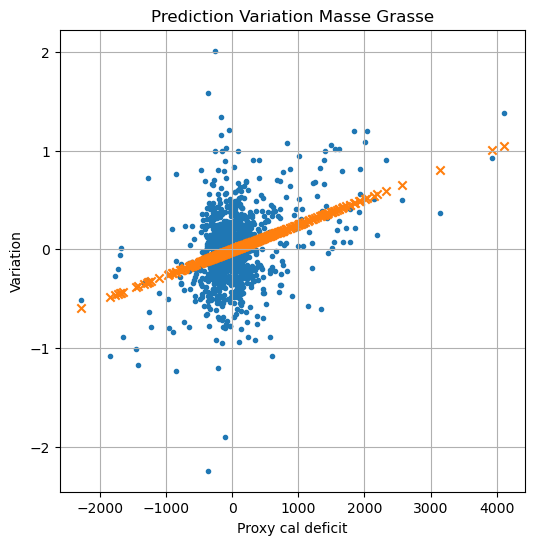

In [63]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(x=df_avg['Proxy_Cal_Def'], y=df_avg['var_MG'], label='ground truth', marker='.')
ax.grid(True)
ax.set_title(f'variation MG fonction de Proxy Cal Def (moyennes)')

X2 = np.array(df_avg['Proxy_Cal_Def']).reshape(-1,1)
y = df_avg['var_MG'].to_numpy()

lr = LinearRegression()
lr.fit(X2, y)

y_pred = lr.predict(X2)

ax.scatter(X2, y_pred, label='prediction', marker='x')
ax.set_xlabel('Proxy cal deficit')
ax.set_ylabel('Variation')
ax.set_title('Prediction Variation Masse Grasse')
ax.grid(True)

print(f'Coefficients = {lr.coef_}')
print(f'r2 = {lr.score(X2,y):.2f}')

plt.show()

### Essais de Régressions Linéaires avec toutes les variables

In [64]:
# list_columns = ['Masse_Totale', 'Masse_Grasse', 'BMR', 'Calories', 'exo_cals_nets', 'Proxy_Cal_Def']
# list_columns =['BMR', 'Calories', 'exo_cals_nets', 'Proxy_Cal_Def']
list_columns =['Calories', 'exo_cals_nets', ]
X = df_avg[list_columns].to_numpy()

# var MT
y_mt = df_avg['var_MT'].to_numpy()
y_mg = df_avg['var_MG'].to_numpy()

In [65]:
def get_df(model):
    """utility fonction pour créer une dataframe à partir des différents coefficients d'un modèle linéaire"""
    
    params = list(model.coef_)
    params.append(model.intercept_)

    df_coeffs = pd.DataFrame(
        data = params,
        index = list_columns + ['intercept']
    )

    return df_coeffs

In [66]:
lr = LinearRegression()

lr.fit(X, y_mt)

print(f'score MT = {lr.score(X, y_mt)}')

print(get_df(lr))

score MT = 0.24384548281785923
                      0
Calories       0.000696
exo_cals_nets -0.000326
intercept     -1.293971


In [67]:
lr = LinearRegression()

lr.fit(X, y_mg)

print(f'score MG = {lr.score(X, y_mt)}')

print(get_df(lr))

score MG = 0.1570810221469371
                      0
Calories       0.000280
exo_cals_nets -0.000174
intercept     -0.509312


### Modèles linéaires Bayesiens sparse : ils disent que les data ne sont que du bruit !

In [68]:
from sklearn import linear_model

In [69]:
# ard = linear_model.ARDRegression()
    
# ard.fit(X, y_mt)
    
# print(f'score ARD MT = {ard.score(X, y_mt)}')
# print(f'estimated std of noise = {np.sqrt(1/ard.alpha_)}')

# print(get_df(ard))

In [70]:
# ard = linear_model.ARDRegression()
    
# ard.fit(X, y_mg)
    
# print(f'score ARD MG = {ard.score(X, y_mg)}')
# print(f'estimated std of noise = {np.sqrt(1/ard.alpha_)}')

# print(get_df(ard))

### Autre essai Bayesien moins sparse : Bayesien Ridge - on retrouve grosso modo les coefficients de la LR avec un estimé du sigma du bruit

In [75]:
brr = linear_model.BayesianRidge()
    
brr.fit(X, y_mt)
    
print(f'score BRR MT = {brr.score(X, y_mt)}')
print(f'estimated std of noise = {np.sqrt(1/brr.alpha_)}')

print(get_df(brr))

score BRR MT = 0.24384475419411833
estimated std of noise = 0.6118756644261449
                      0
Calories       0.000695
exo_cals_nets -0.000324
intercept     -1.292651


In [76]:
# prédiction sur une semaine

food_intake = 1700.0
exos_avg = 200.0

daily_delta_mt = brr.intercept_ + brr.coef_[0] * food_intake + brr.coef_[1] * exos_avg

print(f'Estimé variation de poids total sur une semaine : {daily_delta_mt*7:.2f}')

Estimé variation de poids total sur une semaine : -1.24


In [77]:
brr = linear_model.BayesianRidge()
    
brr.fit(X, y_mg)
    
print(f'score BRR MG = {brr.score(X, y_mg)}')
print(f'estimated std of noise = {np.sqrt(1/brr.alpha_)}')

params = list(brr.coef_)
params.append(brr.intercept_)

print(get_df(brr))

score BRR MG = 0.1338372435826669
estimated std of noise = 0.35839963168482997
                      0
Calories       0.000280
exo_cals_nets -0.000174
intercept     -0.509100


In [78]:
daily_delta_mg = brr.intercept_ + brr.coef_[0] * food_intake + brr.coef_[1] * exos_avg

print(f'Estimé variation de masse grasse totale sur une semaine : {daily_delta_mg*7:.2f}')

Estimé variation de masse grasse totale sur une semaine : -0.48


### On regarde maintenant l'effet du moyennage sur le score de la régression Bayesienne

In [33]:
# PERIODE_MAX = 120

# list_periodes = range(1, PERIODE_MAX)

# list_columns =['Calories', 'exo_cals_nets', ]

# scores_mt = []
# noises_mt = []

# scores_mg = []
# noises_mg = []

# for periode in list_periodes:
#     # créé la dataframe en moyennant sur la période
#     df_avg = get_df_avg(df=df_mg, periode=periode)
#     # print(get_df_avg(df=df_mg, periode=periode))
#     X = df_avg[list_columns].to_numpy()

#     # var MT
#     y_mt = df_avg['var_MT'].to_numpy()
#     y_mg = df_avg['var_MG'].to_numpy()
    
#     # fit le modèle bayesien LR et récupère les paramètres
#     brr = linear_model.BayesianRidge()
    
#     brr.fit(X, y_mt)
#     scores_mt.append(brr.score(X, y_mt))
#     noises_mt.append(np.sqrt(1/brr.alpha_))
    
#     brr.fit(X, y_mg)
#     scores_mg.append(brr.score(X, y_mg))
#     noises_mg.append(np.sqrt(1/brr.alpha_))

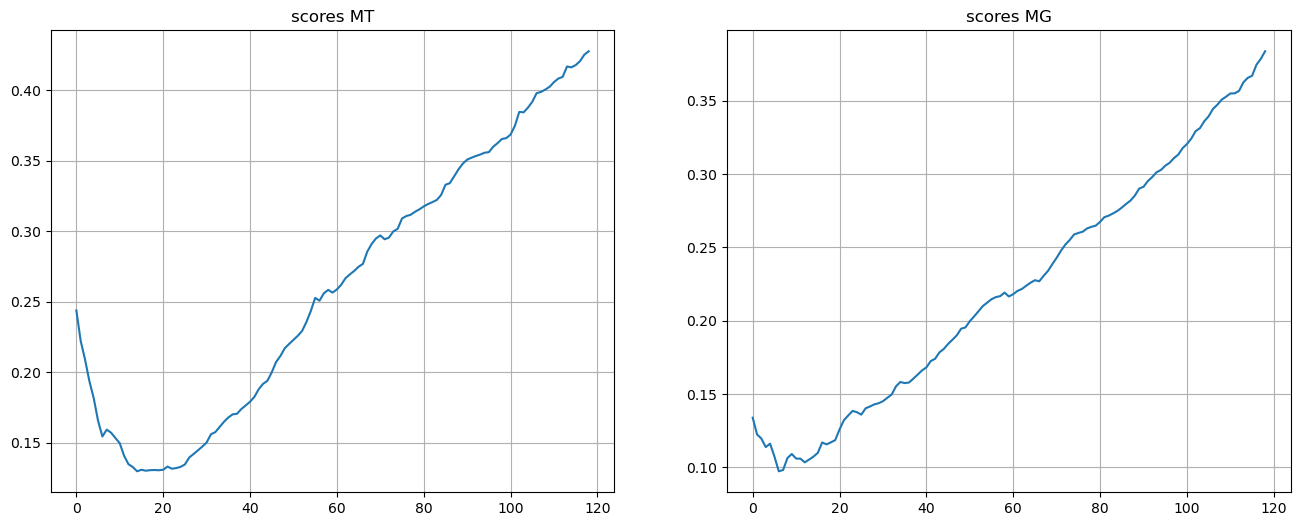

In [34]:
# fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

# axs[0].plot(scores_mt)
# axs[0].set_title(f'scores MT')
# axs[0].grid()

# axs[1].plot(scores_mg)
# axs[1].set_title(f'scores MG')
# axs[1].grid()

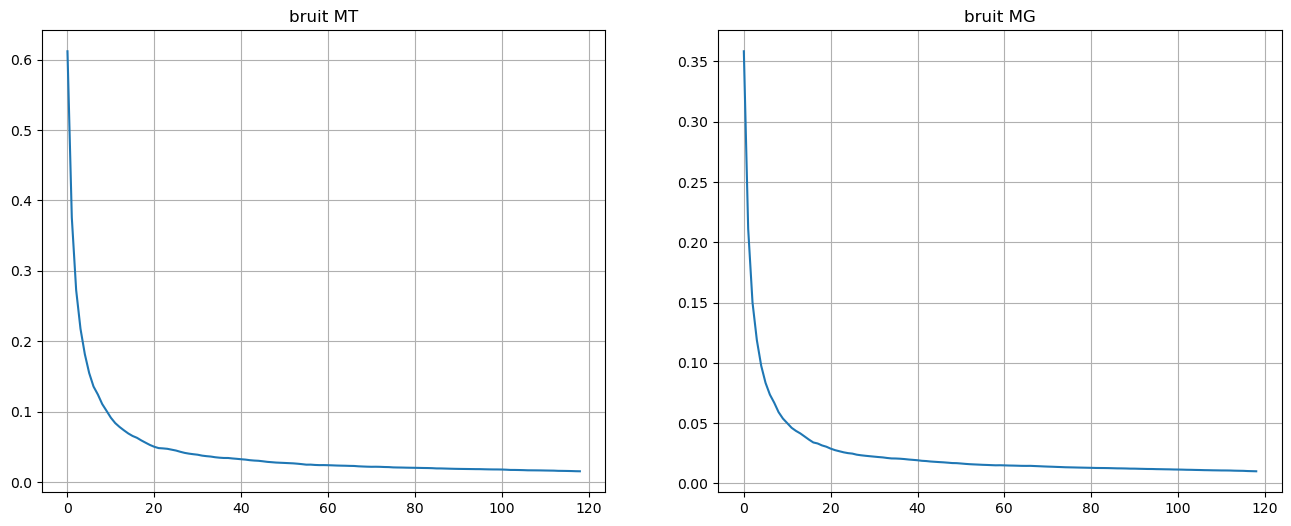

In [35]:
# fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

# axs[0].plot(noises_mt)
# axs[0].set_title(f'bruit MT')
# axs[0].grid()

# axs[1].plot(noises_mg)
# axs[1].set_title(f'bruit MG')
# axs[1].grid()

# Tests modèles

In [36]:
# def print_losses(history, model_name='modele'):
#     """Utility function to display training loss and test loss

#     Args:
#         history (_type_): history out of fit
#     """
    
#     train_loss = history.history.get('loss')
#     test_loss = history.history.get('val_loss')
    
#     fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
    
#     axs[0].plot(train_loss)
#     axs[0].grid()
#     axs[0].set_title('Train loss')
    
#     axs[1].plot(test_loss)
#     axs[1].grid()
#     axs[1].set_title('Test loss')
    
#     titre = 'Losses ' + model_name
#     fig.suptitle(titre)
    
#     return fig, axs

In [37]:
# fig, axs = print_losses(history=history, model_name='LR simple')
# plt.show()

In [38]:
# y_pred_scaled = lr.predict(X_test_scaled)
# y_pred = scaler_y.inverse_transform(y_pred_scaled)

# mses = tf.keras.losses.MSE(y_test_scaled, y_pred_scaled)
# print(f'MSE sur LR (scaled) = {mses.numpy().mean():.2f}')

# mses = tf.keras.losses.MSE(y_test, y_pred)
# print(f'MSE sur LR = {mses.numpy().mean():.4f}')

## MLP

In [39]:
# mlp = tf.keras.Sequential(
#     layers = [
#         tf.keras.Input(shape=len(list_X)),
#         tf.keras.layers.Dense(units=128, activation='relu'),
#         tf.keras.layers.Dense(units=128, activation='relu'),
#         tf.keras.layers.Dense(units=3, activation=None),
#     ]
# )

# mlp.compile(
#     optimizer='rmsprop',
#     loss='mse'
# )

# cb = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss',
#     patience=10,
#     restore_best_weights=True
# )

In [40]:
# history = mlp.fit(
#     X_train_scaled, y_train_scaled, 
#     batch_size=32, 
#     epochs=1000, 
#     validation_data=(X_test_scaled, y_test_scaled),
#     callbacks=[cb]
#     )

In [41]:
# fig, axs = print_losses(history=history, model_name='MLP')
# plt.show()

In [42]:
# y_pred_scaled = mlp.predict(X_test_scaled)
# y_pred = scaler_y.inverse_transform(y_pred_scaled)

# mses = tf.keras.losses.MSE(y_test_scaled, y_pred_scaled)
# print(f'MSE sur MLP (scaled) = {mses.numpy().mean():.2f}')

# mses = tf.keras.losses.MSE(y_test, y_pred)
# print(f'MSE sur MLP = {mses.numpy().mean():.2f}')

## SVM

In [43]:
# from sklearn import svm

# for i, target_name in enumerate(list_y):
#     regr = svm.SVR()
#     regr.fit(X_train_scaled, y_train_scaled[:,i])
    
#     y_pred_scaled = regr.predict(X_test_scaled)
    
#     mses = tf.keras.losses.MSE(y_test_scaled[:,i], y_pred_scaled)
#     print(f'MSE sur {target_name} (scaled) = {mses.numpy().mean():.3f}')

## XGBoost

In [44]:
import xgboost as xgb

In [45]:
# for i, target_name in enumerate(list_y):
    
#     #Creating an XGBoost regressor
#     xgb_model = xgb.XGBRegressor(
#         n_estimators=1000,
#         max_depth=5,
#         random_state=42
#     )
    
#     #Training the model on the training data
#     xgb_model.fit(X_train_scaled, y_train_scaled[:,i])
    
#     y_pred_scaled = xgb_model.predict(X_test_scaled)
    
#     mses = tf.keras.losses.MSE(y_test_scaled[:,i], y_pred_scaled)
#     print(f'MSE XGB sur {target_name} (scaled) = {mses.numpy().mean():.3f}')

### RVM aka ARD sous scikit-learn

In [46]:
from sklearn import linear_model

In [47]:
# for i, target_name in enumerate(list_y):
    
#     ard = linear_model.ARDRegression()
    
#     #Training the model on the training data
#     ard.fit(X_train_scaled, y_train_scaled[:,i])
    
#     y_pred_scaled = ard.predict(X_test_scaled)
    
#     mses = tf.keras.losses.MSE(y_test_scaled[:,i], y_pred_scaled)
#     print(f'MSE ARD sur {target_name} (scaled) = {mses.numpy().mean():.3f}')
#     print(f'coefficients = {ard.coef_}')
#     # print(f'estimated std of weights = {np.sqrt(1/ard.lambda_)}')
#     print(f'estimated std of noise = {np.sqrt(1/ard.alpha_)}')
#     print(f'\n')